In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load the data
data = pd.read_csv('data.csv')

# Replace 0 with mean
data = data.replace(0, data.mean())

# Display the data
data.head()


,PUBLICATION_REVIEW_PAPER,PUBLICATION_FLAGSHIP_JOURNALS,PUBLICATION_Q1_Q2,PUBLICATION_WOS_INDEXED_JOURNAL,PUBLICATION_SCOPUS_INDEX_JOURNAL,PUBLICATION_INDEXED_PROCEEDING,PUBLICATION_PROCEEDING,PUBLICATION_RESEARCHBOOK,PUBLICATION_TEXTBOOK,PUBLICATION_EDITEDBOOK,...,CITATION__1000_3000,CITATION_3000_5000,CITATION_5000_10000,CPF_PER_ACADEMIC_STAFF,CONSULTATION_CONFERENCE_SEMINAR,CONSULTATION_CONSULTANCY,CONSULTATION_TRAINING_SHORTCOURSES,MENTION_NEGATIVE,MENTION_NEUTRAL,MENTION_POSITIVE
0,258.0,261.0,1040,1731.0,871.0,897.0,617,15.0,23,7.4,...,20,4,3,NaN,12.00,15.0,4.00,1.000000,45.00,33.0
1,283.0,254.0,1239,1910.0,561.0,644.0,4,28.0,34,6.0,...,20,4,3,NaN,22.00,10.0,5.00,2.000000,42.00,59.0
2,318.0,283.0,1203,1811.0,614.0,682.0,11,47.0,42,31.0,...,20,4,3,NaN,15.00,17.0,10.00,1.333333,2.00,24.0
3,292.0,205.0,1253,1792.0,672.0,829.0,158,56.0,18,7.4,...,20,4,3,NaN,20.00,16.0,20.00,1.333333,22.75,1.0
4,230.2,200.6,947,1448.8,543.6,610.4,158,29.2,4,7.4,...,19,4,3,NaN,17.25,14.5,9.75,1.000000,2.00,3.0


In [11]:
# 1. First check data quality
from math import nan

def clean_dataset(data):
    # Define threshold (4 rows)
    threshold = 4

    # Check if data is empty
    if data.empty:
        raise ValueError("Dataset is empty")
    
    # Check zeros
    zero_mask = (data == 0).sum() > threshold
    zero_cols = data.columns[zero_mask]
    if len(zero_cols) > 0:
        print(f"Dropping columns with > {threshold} zeros: {list(zero_cols)}")
        data = data.drop(zero_cols, axis=1)

    # Check NaN values 
    nan_mask = data.isna().sum() > threshold
    nan_cols = data.columns[nan_mask]
    if len(nan_cols) > 0:
        print(f"Dropping columns with > {threshold} NaN values: {list(nan_cols)}")
        data = data.drop(nan_cols, axis=1)
    
    # Check missing values before filling
    missing_stats = data.isnull().sum()
    if missing_stats.any():
        print("Missing values per column:")
        print(missing_stats[missing_stats > 0])
    
    # Fill missing values with median
    # Consider column type before filling
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
    
    # Fill non-numeric columns with mode if needed
    non_numeric_cols = data.select_dtypes(exclude=['int64', 'float64']).columns
    if len(non_numeric_cols) > 0:
        data[non_numeric_cols] = data[non_numeric_cols].fillna(data[non_numeric_cols].mode().iloc[0])
    
    return data

# Usage
try:
    data = clean_dataset(data)
    print("\nData cleaning completed successfully")
    # Save cleaned data
    data.to_csv('data_cleaned.csv', index=False)
    display(data.head())
except Exception as e:
    print(f"Error during data cleaning: {str(e)}")

Dropping columns with > 4 NaN values: ['PAPER_INCENTIVE_TOTAL_ALLOCATION_STAFF', 'CPF_PER_ACADEMIC_STAFF']

Data cleaning completed successfully


,PUBLICATION_REVIEW_PAPER,PUBLICATION_FLAGSHIP_JOURNALS,PUBLICATION_Q1_Q2,PUBLICATION_WOS_INDEXED_JOURNAL,PUBLICATION_SCOPUS_INDEX_JOURNAL,PUBLICATION_INDEXED_PROCEEDING,PUBLICATION_PROCEEDING,PUBLICATION_RESEARCHBOOK,PUBLICATION_TEXTBOOK,PUBLICATION_EDITEDBOOK,...,CITATION_500_1000,CITATION__1000_3000,CITATION_3000_5000,CITATION_5000_10000,CONSULTATION_CONFERENCE_SEMINAR,CONSULTATION_CONSULTANCY,CONSULTATION_TRAINING_SHORTCOURSES,MENTION_NEGATIVE,MENTION_NEUTRAL,MENTION_POSITIVE
0,258.0,261.0,1040,1731.0,871.0,897.0,617,15.0,23,7.4,...,44,20,4,3,12.00,15.0,4.00,1.000000,45.00,33.0
1,283.0,254.0,1239,1910.0,561.0,644.0,4,28.0,34,6.0,...,45,20,4,3,22.00,10.0,5.00,2.000000,42.00,59.0
2,318.0,283.0,1203,1811.0,614.0,682.0,11,47.0,42,31.0,...,44,20,4,3,15.00,17.0,10.00,1.333333,2.00,24.0
3,292.0,205.0,1253,1792.0,672.0,829.0,158,56.0,18,7.4,...,42,20,4,3,20.00,16.0,20.00,1.333333,22.75,1.0
4,230.2,200.6,947,1448.8,543.6,610.4,158,29.2,4,7.4,...,41,19,4,3,17.25,14.5,9.75,1.000000,2.00,3.0


## Boostrap Data

In [14]:
# Boostrap the data to 1000 samples
from ensurepip import bootstrap


data = data.sample(n=1000, replace=True)

bootstrap_data = data.to_csv('data_bootstrap.csv', index=False)
data

,PUBLICATION_REVIEW_PAPER,PUBLICATION_FLAGSHIP_JOURNALS,PUBLICATION_Q1_Q2,PUBLICATION_WOS_INDEXED_JOURNAL,PUBLICATION_SCOPUS_INDEX_JOURNAL,PUBLICATION_INDEXED_PROCEEDING,PUBLICATION_PROCEEDING,PUBLICATION_RESEARCHBOOK,PUBLICATION_TEXTBOOK,PUBLICATION_EDITEDBOOK,...,CITATION_500_1000,CITATION__1000_3000,CITATION_3000_5000,CITATION_5000_10000,CONSULTATION_CONFERENCE_SEMINAR,CONSULTATION_CONSULTANCY,CONSULTATION_TRAINING_SHORTCOURSES,MENTION_NEGATIVE,MENTION_NEUTRAL,MENTION_POSITIVE
1,283.0,254.0,1239,1910.0,561.0,644.0,4,28.0,34,6.0,...,45,20,4,3,22.00,10.0,5.00,2.000000,42.00,59.0
1,283.0,254.0,1239,1910.0,561.0,644.0,4,28.0,34,6.0,...,45,20,4,3,22.00,10.0,5.00,2.000000,42.00,59.0
1,283.0,254.0,1239,1910.0,561.0,644.0,4,28.0,34,6.0,...,45,20,4,3,22.00,10.0,5.00,2.000000,42.00,59.0
1,283.0,254.0,1239,1910.0,561.0,644.0,4,28.0,34,6.0,...,45,20,4,3,22.00,10.0,5.00,2.000000,42.00,59.0
4,230.2,200.6,947,1448.8,543.6,610.4,158,29.2,4,7.4,...,41,19,4,3,17.25,14.5,9.75,1.000000,2.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,318.0,283.0,1203,1811.0,614.0,682.0,11,47.0,42,31.0,...,44,20,4,3,15.00,17.0,10.00,1.333333,2.00,24.0
0,258.0,261.0,1040,1731.0,871.0,897.0,617,15.0,23,7.4,...,44,20,4,3,12.00,15.0,4.00,1.000000,45.00,33.0
3,292.0,205.0,1253,1792.0,672.0,829.0,158,56.0,18,7.4,...,42,20,4,3,20.00,16.0,20.00,1.333333,22.75,1.0
3,292.0,205.0,1253,1792.0,672.0,829.0,158,56.0,18,7.4,...,42,20,4,3,20.00,16.0,20.00,1.333333,22.75,1.0


## Feature Selection using Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load cleaned data
data = pd.read_csv('data_bootstrap.csv')
features = data.drop('SCORE_AR', axis=1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Define autoencoder architecture
def create_autoencoder(input_dim, encoding_dim=15):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(32, activation='relu')(input_layer)
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    
    # Decoder
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='linear')(decoded)
    
    # Models
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    
    return autoencoder, encoder

# Create and train model
input_dim = X.shape[1]
autoencoder, encoder = create_autoencoder(input_dim)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, verbose=0)

# Save model
encoder.save('encoder_model.keras')

# Predict target scores
scores = encoder.predict(X)

# Reverse score normalization
scores = scaler.inverse_transform(scores)
print("Scores predicted successfully")
print(scores)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
# Reverse score normalization
scores = scaler.inverse_transform(scores)
print("Scores predicted successfully")
print(scores)

ValueError: operands could not be broadcast together with shapes (1000,15) (69,) (1000,15) 

Scores predicted successfully
[[0.46751267 0.         0.         ... 0.         0.50864166 3.4138987 ]
 [0.46751267 0.         0.         ... 0.         0.50864166 3.4138987 ]
 [0.46751267 0.         0.         ... 0.         0.50864166 3.4138987 ]
 ...
 [0.         4.172784   1.0995313  ... 3.5533776  0.         0.        ]
 [0.         4.172784   1.0995317  ... 3.5533776  0.         0.        ]
 [0.         4.172784   1.0995317  ... 3.5533776  0.         0.        ]]


In [ ]:


# Calculate feature importance
feature_importance = []
for i in range(input_dim):
    X_modified = X.copy()
    X_modified[:, i] = 0  # Zero out one feature
    reconstruction_error = np.mean((X - autoencoder.predict(X_modified, verbose=0)) ** 2)
    feature_importance.append(reconstruction_error)

# Create feature importance DataFrame
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Score': feature_importance
})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display top features
print("Top 15 Most Important Features:")
display(feature_scores)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(feature_scores['Feature'][:15], feature_scores['Score'][:15])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on Autoencoder Reconstruction Error')
plt.tight_layout()
plt.show()

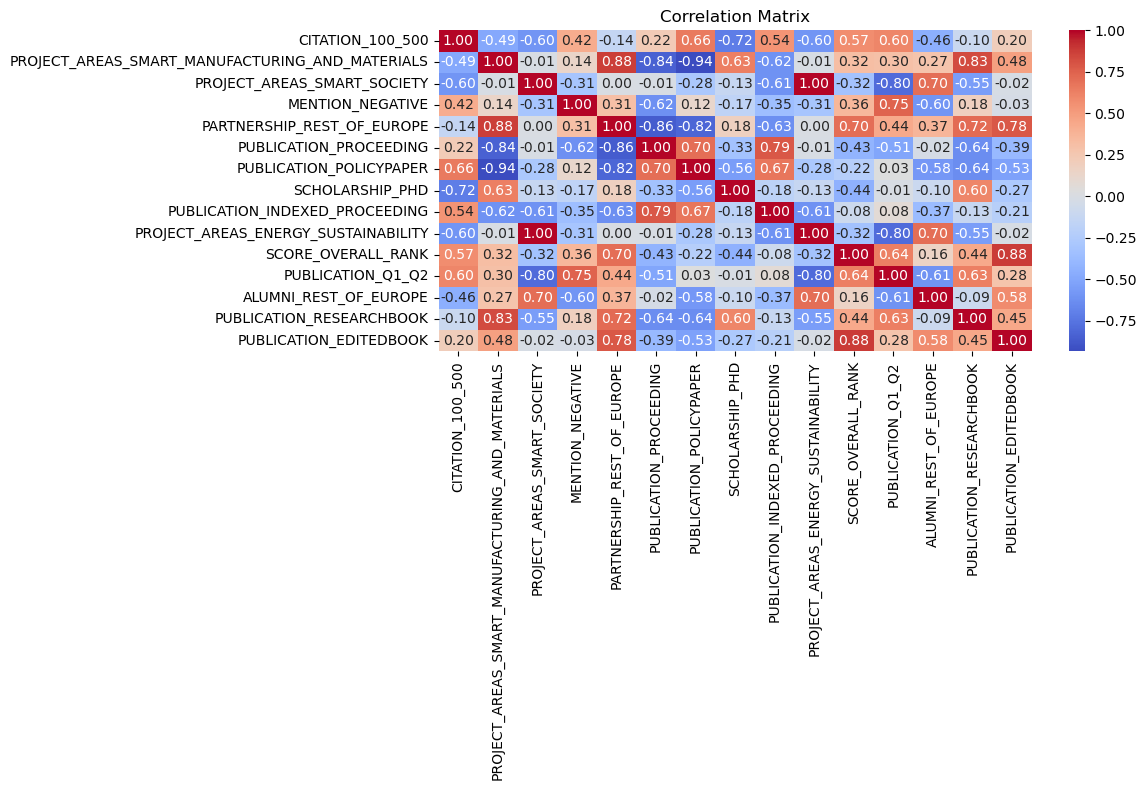

In [21]:
# Correlation matrix for top 15 features
top_features = feature_scores['Feature'][:15]
data = data[top_features]

# coorelation matrix between features and target
correlation_matrix = data.corr()
# correlation_matrix['SCORE_AR'].sort_values(ascending=False)

# display the correlation matrix in heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.head(15), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Feature Selection using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Define the target variable and features
target = 'SCORE_AR'
features = data.drop(columns=[target])

# Perform feature selection using regression

# Create a linear regression model
model = LinearRegression()

# Perform RFE (Recursive Feature Elimination)
selector = RFE(model, n_features_to_select=None)
selector = selector.fit(features, data[target])

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': features.columns, 'Score': selector.ranking_})
feature_scores = feature_scores.sort_values(by='Score', ascending=True)

# Display the scores
print(feature_scores)

                                              Feature  Score
34                PROJECT_AREAS_ENERGY_SUSTAINABILITY      1
23                            KEYNOTE_SPEAKER_INVITED      1
30                            PARTNERSHIP_COUNTRY_N_A      1
31                               PARTNERSHIP_NATIONAL      1
32  PROJECT_AREAS_BIOMEDICAL_AND_HEALTHCARE_ENGINE...      1
..                                                ...    ...
48                           CONFERENCE_SUMMER_SCHOOL     32
16               ALUMNI_CENTRAL_AMERICA_AND_CARIBBEAN     33
41                 PROJECT_AREAS_SMART_TRANSPORTATION     34
28                                PARTNERSHIP_OCEANIA     35
27                          PARTNERSHIP_NORTH_AMERICA     36

[69 rows x 2 columns]


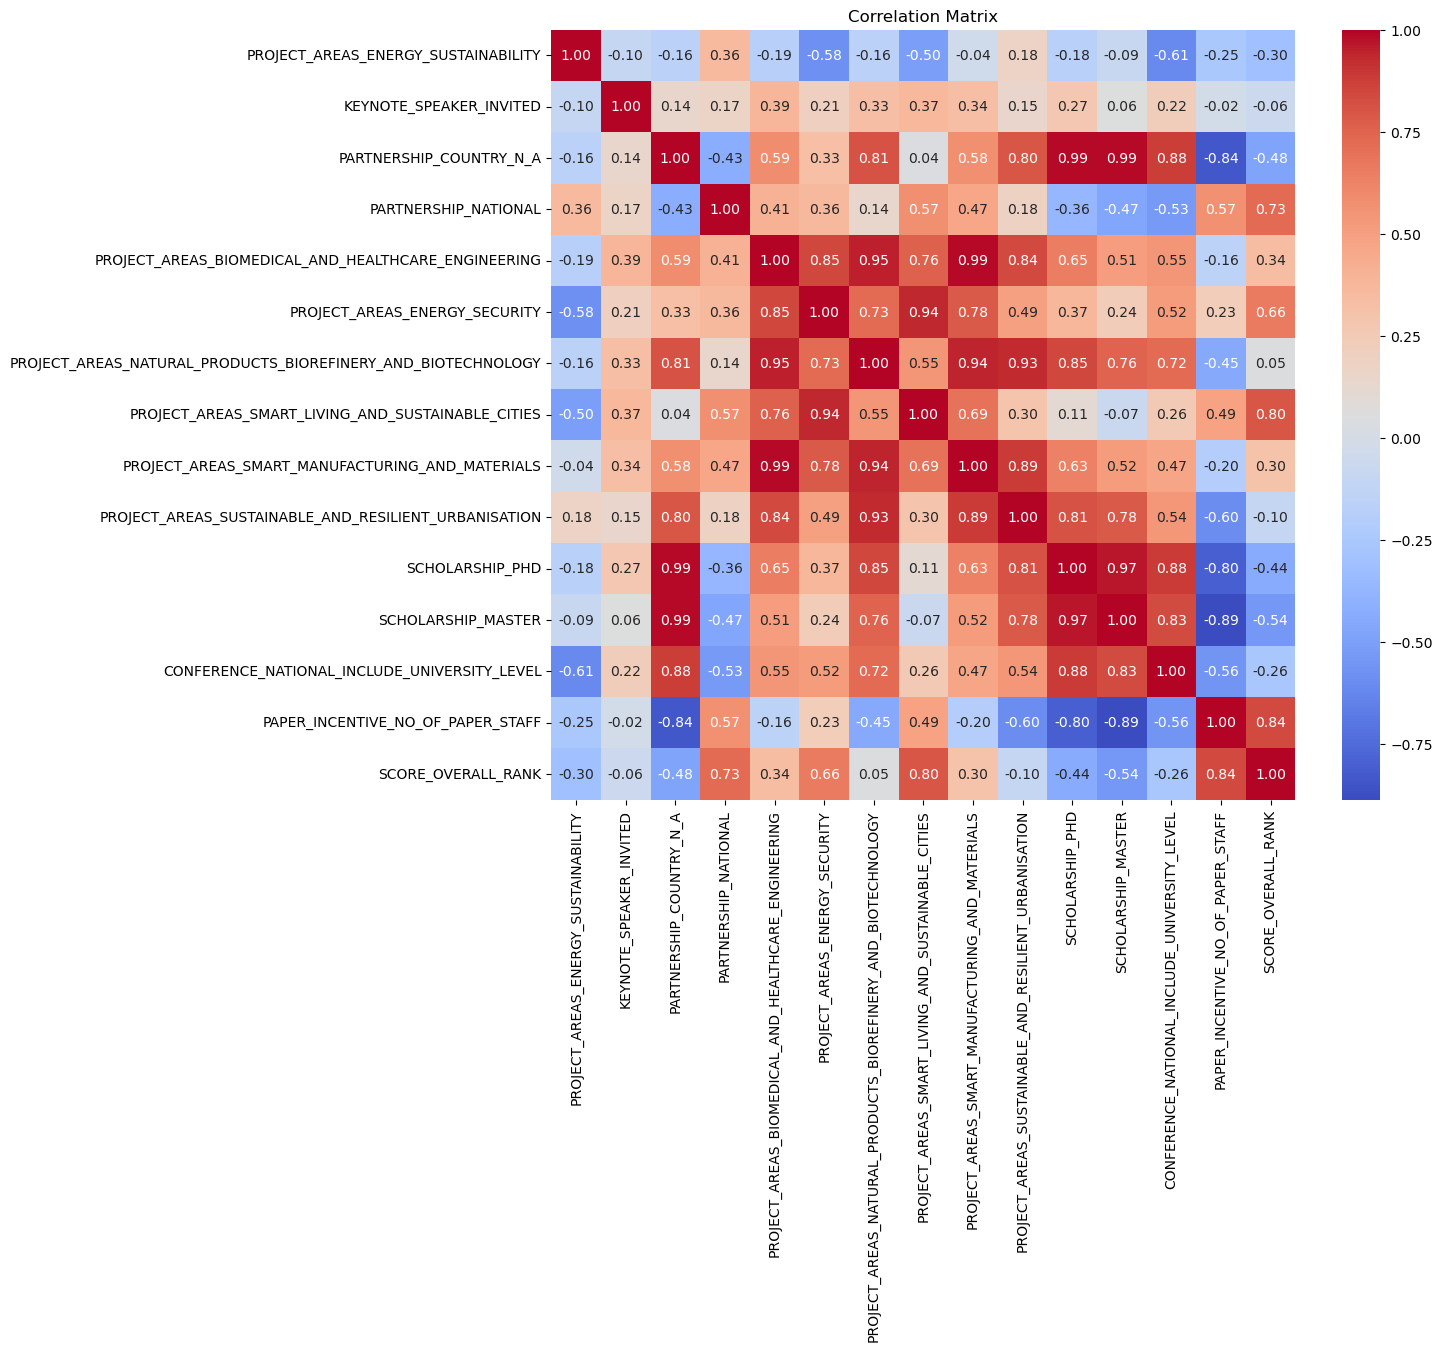

In [10]:
# Correlation matrix for top 15 features
top_features = feature_scores['Feature'][:15]
data = data[top_features]

# Calculate the correlation matrix
corr_matrix = data.corr()

# display the correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# save to csv
data.to_csv('selected_features_corr_matrix.csv', index=False)

In [5]:
# Save top 15 features into pickle file
top_features = feature_scores['Feature'][:15]
top_features.to_pickle('top_features.pkl')